In [2]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df1 = pd.read_csv('data/mu100-199.csv')
df2 = pd.read_csv('data/mu200-299.csv')
df3 = pd.read_csv('data/mu300-399.csv')
df4 = pd.read_csv('data/mu400-499.csv')
df5 = pd.read_csv('data/mu500-599.csv')
df6 = pd.read_csv('data/mu600-699.csv')
df7 = pd.read_csv('data/mu700-799.csv')
df8 = pd.read_csv('data/mu800-899.csv')
df9 = pd.read_csv('data/mu900-999.csv')
df10 = pd.read_csv('data/mu1000-.csv')

In [4]:
df = df1.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df = df.append(df6, ignore_index=True)
df = df.append(df7, ignore_index=True)
df = df.append(df8, ignore_index=True)
df = df.append(df9, ignore_index=True)
df = df.append(df10, ignore_index=True)

In [5]:
df.shape

(13579, 75)

In [6]:
drop_columns = ['Waterfront', 'Water/Sewer Exp', 'WTR', 'Reps&Maint Exp', 'Misc Exp', 'Mgmnt Fee', 'Ins exp',
                'HERS Index', 'Heat Exp', 'Gas Exp', 'Garage Fee/Lease $', 'ELEC', 'FUE', 'As/Asc Dues',
                'ASF', 'Trash Exp', 'ZP4', 'SF_UN1', 'SF_UN2', 'SF_UN3', 'SF_UN4']

In [7]:
df.drop(columns=drop_columns, inplace=True)

In [8]:
def transform_rent(cell):
    '''
    This function sets non-int values to 0 and removes $ signs.
    '''
    str_cell = str(cell)
    new_cell = str_cell.replace('$', '')
    cell_return = 0
    try: 
        cell_return = int(new_cell)
        return cell_return
    except (KeyError, ValueError):
        return cell_return

In [9]:
df['Rent_1'] = df['Rnt - Un 1'].map(transform_rent)
df['Rent_2'] = df['Rnt - Un 2'].map(transform_rent)
df['Rent_3'] = df['Rnt - Un 3'].map(transform_rent)
df['Rent_4'] = df['Rnt - Un 4'].map(transform_rent)
df.drop(columns=['Rnt - Un 1', 'Rnt - Un 2', 'Rnt - Un 3', 'Rnt - Un 4'], inplace=True)

In [10]:
def transform_br(cell):
    
    str_cell = str(cell)
    new_cell = str_cell.replace('+', '').replace('-', '')
    cell_return = 0
    
    try: 
        cell_return = int(new_cell)
        return cell_return
    
    except ValueError:
        if new_cell.endswith('.0'):
            cell_return = int(new_cell[0])
            return cell_return

In [11]:
df['BR_1'] = df['BR1'].map(transform_br)
df['BR_2'] = df['BR2'].map(transform_br)
df['BR_3'] = df['BR3'].map(transform_br)
df['BR_4'] = df['BR4'].map(transform_br)
df.drop(columns=['BR1', 'BR2', 'BR3', 'BR4'], inplace=True)

In [12]:
df.dropna(subset=['BR_1'], inplace=True)
df.shape

(13577, 54)

In [13]:
df.drop(index=df[df['Tot # Units'] == '2+'].index, inplace=True)
df.shape

(13571, 54)

In [14]:
df.drop(index=df[df['Tot # Units'] == '2-'].index, inplace=True)
df.shape

(13570, 54)

In [15]:
df['Tot # Units'] = df['Tot # Units'].astype(int)

In [16]:
df.drop(index=df[df['Tot # Units'] > 4].index, inplace=True)
df.shape

(13548, 54)

In [17]:
df.drop(index=df[df['Tot # Units'] == 1].index, inplace=True)
df.shape

(13540, 54)

In [18]:
df.drop(index=df[(df['Rent_1'] == 0) & (df['Rent_2'] == 0)].index, inplace=True)
df.shape

(8081, 54)

In [19]:
df.drop(index=df[df['BR_1'] == 0].index, inplace=True)
df.drop(index=df[df['BR_2'] == 0].index, inplace=True)
df.shape

(8027, 54)

In [20]:
df_2u = df[df['Tot # Units'] == 2]
df_3u = df[df['Tot # Units'] == 3]
df_4u = df[df['Tot # Units'] == 4]

In [21]:
for n in range(0,10):
    for i in df_2u.index:
        df_2u['BR_3'][i] = 0
        df_2u['BR_4'][i] = 0
        df_2u['Rent_3'][i] = 0
        df_2u['Rent_4'][i] = 0
        df_2u['# Full Baths-Unit 3'][i] = 0
        df_2u['# Full Baths-Unit 4'][i] = 0

In [22]:
for n in range(0,10):
    for i in df_2u.index:
        if (df_2u['Rent_1'][i] == 0) & (df_2u['Rent_2'][i] != 0):
            df_2u['Rent_1'][i] = (df_2u['Rent_2'][i]/df_2u['BR_2'][i])*df_2u['BR_1'][i]
        elif (df_2u['Rent_1'][i] != 0) & (df_2u['Rent_2'][i] == 0):
            df_2u['Rent_2'][i] = (df_2u['Rent_1'][i]/df_2u['BR_1'][i])*df_2u['BR_2'][i]

In [23]:
df_3u.drop(index=df_3u[df_3u['BR_3'] == 0].index, inplace=True)

In [24]:
for n in range(0,10):
    for i in df_3u.index:
        df_3u['BR_4'][i] = 0
        df_3u['Rent_4'][i] = 0
        df_3u['# Full Baths-Unit 4'][i] = 0

In [25]:
for n in range(0,10):
    for i in df_3u.index:
        if (df_3u['Rent_1'][i] == 0) & (df_3u['Rent_2'][i] != 0):
            df_3u['Rent_1'][i] = (df_3u['Rent_2'][i]/df_3u['BR_2'][i])*df_3u['BR_1'][i]
        elif (df_3u['Rent_1'][i] != 0) & (df_3u['Rent_2'][i] == 0):
            df_3u['Rent_2'][i] = (df_3u['Rent_1'][i]/df_3u['BR_1'][i])*df_3u['BR_2'][i]
        elif df_3u['Rent_3'][i] == 0:
            df_3u['Rent_3'][i] = (df_3u['Rent_1'][i]/df_3u['BR_1'][i])*df_3u['BR_3'][i]

In [26]:
df_4u.drop(index=df_4u[df_4u['BR_3'] == 0].index, inplace=True)
df_4u.drop(index=df_4u[df_4u['BR_4'] == 0].index, inplace=True)

In [27]:
for n in range(0,10):
    for i in df_4u.index:
        if (df_4u['Rent_1'][i] == 0) & (df_4u['Rent_2'][i] != 0):
            df_4u['Rent_1'][i] = (df_4u['Rent_2'][i]/df_4u['BR_2'][i])*df_4u['BR_1'][i]
        elif (df_4u['Rent_1'][i] != 0) & (df_4u['Rent_2'][i] == 0):
            df_4u['Rent_2'][i] = (df_4u['Rent_1'][i]/df_4u['BR_1'][i])*df_4u['BR_2'][i]
        elif df_4u['Rent_3'][i] == 0:
            df_4u['Rent_3'][i] = (df_4u['Rent_1'][i]/df_4u['BR_1'][i])*df_4u['BR_3'][i]
        elif df_4u['Rent_4'][i] == 0:
            df_4u['Rent_4'][i] = (df_4u['Rent_1'][i]/df_4u['BR_1'][i])*df_4u['BR_4'][i]

In [28]:
df_main = df_2u.append(df_3u, ignore_index=True)
df_main = df_main.append(df_4u, ignore_index=True)
df_main.reset_index(drop=True, inplace=True)

In [29]:
df_main['Total_Rent_Monthly'] = df_main['Rent_1']+df_main['Rent_2']+df_main['Rent_3']+df_main['Rent_4']

In [30]:
df_main['Total_Rent_Annual'] = df_main['Total_Rent_Monthly']*12

In [31]:
def transform_noi(cell):
    '''
    This function converts non-null strings into null values.
    '''
    str_cell = str(cell)
    cell_return = np.NaN
    try: 
        cell_return = int(str_cell)
        return cell_return
    except (KeyError, ValueError):
        return cell_return

In [32]:
df_main['NOI'] = df_main['NOI'].map(transform_noi)

In [33]:
df_main['NOI:Rent'] = df_main[df_main['NOI'].notnull()]['NOI']/df_main[df_main['NOI'].notnull()]['Total_Rent_Annual']
avg_NOI_ratio = np.mean(df_main['NOI:Rent'])
avg_NOI_ratio

0.6623064532113141

In [34]:
df_main['Estimated NOI'] = round(df_main['Total_Rent_Annual']*avg_NOI_ratio, ndigits=0)
df_main['Estimated NOI'] = df_main['Estimated NOI'].astype(int)

In [35]:
drop_more = ['Stat', 'Lse Exp Dt - Un 1', 'Lse Exp Dt - Un 2', 'Lse Exp Dt - Un 3', 'Lse Exp Dt - Un 4',
             '3 Br Un In Bldg', 'NOI', 'NOI:Rent', 'Tot Rnt Inc', 'Street #', 'CP', 'Area', 'Orig List Pr',
             'Address', 'LIST', 'LMT', 'Grs Inc', 'Br Own/Int', 'Garage Ownership', 'Rebuilt', '% PCH - OLP']

In [36]:
df_main.drop(columns=drop_more, inplace=True)

In [37]:
unique_exterior = set([x for cell in [cell.split(', ') for cell in df_main['Exterior']] for x in cell])
# movies_df = movies_df.join(movies_df.genre.str.get_dummies(', '))
unique_exterior

{'Aluminum Siding',
 'Aluminum/Vinyl/Steel Siding',
 'Asbestos Siding',
 'Block',
 'Brick',
 'Cedar',
 'Clad Trim',
 'Concrete',
 'EIFS (e.g. Dryvit)',
 'Frame',
 'Glass',
 'Limestone',
 'Log',
 'Marble/Granite',
 'Masonite',
 'Other',
 'Shakes',
 'Shingle Siding',
 'Slate',
 'Steel Siding',
 'Stone',
 'Stucco',
 'Vinyl Siding'}

In [38]:
df_main['Exterior Property Features'] = df_main['Exterior Property Features'].astype(str)
for i in df_main['Exterior Property Features'].index:
    if df_main['Exterior Property Features'][i] == 'nan':
        df_main['Exterior Property Features'][i] = 'None'

In [39]:
unique_outdoor = set([x for cell in [cell.split(', ') for cell in df_main['Exterior Property Features']] for x in cell])
# movies_df = movies_df.join(movies_df.genre.str.get_dummies(', '))
unique_outdoor

{'Balcony',
 'Breezeway',
 'Brick Paver Patio',
 'Cable Access',
 'Deck',
 'Dog Run',
 'Door Monitored By TV',
 'Fire Pit',
 'Hot Tub',
 'Master Antenna',
 'None',
 'Outdoor Grill',
 'Patio',
 'Pool Above Ground',
 'Pool In-Ground',
 'Porch',
 'Porch Screened',
 'Roof Deck',
 'Screened Deck',
 'Screened Patio',
 'Stamped Concrete Patio',
 'Storms/Screens',
 'Workshop'}

In [40]:
df_main['Amen'] = df_main['Amen'].astype(str)
for i in df_main['Amen'].index:
    if df_main['Amen'][i] == 'nan':
        df_main['Amen'][i] = 'None'

In [41]:
unique_amenities = set([x for cell in [cell.split(', ') for cell in df_main['Amen']] for x in cell])
unique_amenities

{'Clubhouse',
 'Curbs/Gutters',
 'Dock-Community',
 'Gated Entry',
 'Horse-Community Barn',
 'Horse-Riding Area',
 'None',
 'Other',
 'Park/Playground',
 'Pond/Lake',
 'Pool',
 'Sidewalks',
 'Street Lights',
 'Street Paved',
 'Tennis Courts',
 'Water Rights'}

In [42]:
df_main['# Garage Spaces'] = df_main['# Garage Spaces'].astype(str)
for i in df_main['# Garage Spaces'].index:
    if df_main['# Garage Spaces'][i] == 'nan':
        df_main['# Garage Spaces'][i] = '0'
df_main['# Garage Spaces'] = df_main['# Garage Spaces'].astype(float)

In [43]:
df_main['# Parking Spaces'] = df_main['# Parking Spaces'].astype(str)
for i in df_main['# Parking Spaces'].index:
    if df_main['# Parking Spaces'][i] == 'nan':
        df_main['# Parking Spaces'][i] = '0'
df_main['# Parking Spaces'] = df_main['# Parking Spaces'].astype(float)

In [44]:
for i in df_main[df_main['Rehab'].isna() == True].index:
    df_main['Rehab'][i] = 'No'

In [45]:
drop_ages = list(df_main['Age'].value_counts().tail(12).index)

In [46]:
drop_index_age = []
for i in df_main.index:
    if df_main['Age'][i] in drop_ages:
        drop_index_age.append(i)

In [47]:
df_main.drop(index=drop_index_age, inplace=True)

In [48]:
old = ['91-100 Years', '81-90 Years', '71-80 Years', '61-70 Years', '51-60 Years', '51-100 Years']
medium = ['41-50 Years', '26-50 Years', '31-40 Years', '26-30 Years']
new = ['21-25 Years', '11-25 Years', '16-20 Years', '6-10 Years', '1-5 Years', '11-15 Years']

In [49]:
for n in range(0,10):
    for i in df_main.index:
        if df_main['Age'][i] == 'Unknown':
            df_main['Age'][i] = '51-100 Years'
        elif df_main['Age'][i] == '100+ Years':
            df_main['Age'][i] = '100+ Years Old'
        elif df_main['Age'][i] in old:
            df_main['Age'][i] = '51 to 100 Yrs Old'
        elif df_main['Age'][i] in medium:
            df_main['Age'][i] = '26 to 50 Yrs Old'
        elif df_main['Age'][i] in new:
            df_main['Age'][i] = '1 to 25 Yrs Old'

In [50]:
df_main.drop(columns=['Ten Pays - Un 1', 'Ten Pays - Un 2', 'Ten Pays - Un 3', 'Ten Pays - Un 4'], inplace=True)

In [51]:
df_main['Total_BRs'] = df_main['BR_1']+df_main['BR_2']+df_main['BR_3']+df_main['BR_4']
df_main['Total_Bath'] = df_main['# Full Baths-Unit 1']+df_main['# Full Baths-Unit 2']+df_main['# Full Baths-Unit 3']+df_main['# Full Baths-Unit 4']

In [52]:
def transform_zip(cell):
    old_cell = str(cell)
    new_cell = old_cell[0:5]
    return int(new_cell)

In [53]:
df_main['Zip_Code'] = df_main['Zip'].map(transform_zip)

In [54]:
df_main.drop(columns='Zip', inplace=True)

In [55]:
zip_income = pd.read_excel('data/irs_mean_income_zip.xlsx')

In [56]:
zip_income['Zip_Code'] = zip_income['Zip']
zip_income.drop(columns='Zip', inplace=True)

In [57]:
zip_df = zip_income.groupby('Zip_Code').mean()
zip_df.reset_index(inplace=True)

In [58]:
df_main = df_main.merge(zip_df, how='left', on='Zip_Code')

In [59]:
df_main['Closed Date'] = pd.to_datetime(df_main['Closed Date'])

In [60]:
def transform_tax(cell):
    '''
    This function removes $ and , from annual tax value.
    '''
    str_cell = str(cell)
    new_cell = str_cell.replace(',', '').replace('$', '').replace('-', '')
    cell_return = 0
    try: 
        cell_return = int(round(float(new_cell), ndigits=0))
        return cell_return
    except (KeyError, ValueError):
        return cell_return

In [61]:
df_main['Taxes'][1474] = '4930.92'
df_main['Taxes'] = df_main['Taxes'].map(transform_tax)

In [62]:
drop_notax = list(df_main[df_main['Taxes'] < 1000].index)
df_main.drop(index=drop_notax, inplace=True)

In [63]:
df_main.dropna(subset=['Lat', 'Long', 'Mean Annual Income'], inplace=True)

In [64]:
for n in range(0,4):
    for i in df_main.index:
        df_main['Mean Annual Income'][i] = int(round(df_main['Mean Annual Income'][i], ndigits=0))

Monthly Interest Payment = Principle*(monthly interest rate'r'*(1+r)**(30*12) / (1+r)**(30*12) - 1

In [65]:
d = .2
r = .035/12
n = 360
p = 400000
l = p-(p*d)
m = l*((r*(1+r)**n)/(((1+r)**n)-1))
m

1436.943000988235

In [66]:
df_main['Monthly_Profit'] = 0
df_main['Monthly_P&I_20_Down'] = 0
df_main['Monthly_Estimated_Ins'] = 0
for n in range(0,4):
    for i in df_main.index:
        p = df_main['List Price'][i]*.8
        r = .035/12
        n = 360
        df_main['Monthly_Estimated_Ins'][i] = (p*.005)/12
        df_main['Monthly_P&I_20_Down'][i] = p*((r*(1+r)**n)/(((1+r)**n)-1))
        df_main['Monthly_Profit'][i] = (df_main['Estimated NOI'][i]/12) - ((df_main['Taxes'][i]/12)+\
                                                                           df_main['Monthly_P&I_20_Down'][i]+\
                                                                           df_main['Monthly_Estimated_Ins'][i])

In [67]:
df_main.dropna(inplace=True)

In [68]:
df_main.reset_index(drop=True, inplace=True)

In [69]:
df_main.head(1)

,MLS #,Parking,# Garage Spaces,# Parking Spaces,Tot # Units,# Full Baths-Unit 1,# Full Baths-Unit 2,# Full Baths-Unit 3,# Full Baths-Unit 4,Age,...,Estimated NOI,Total_BRs,Total_Bath,Zip_Code,Lat,Long,Mean Annual Income,Monthly_Profit,Monthly_P&I_20_Down,Monthly_Estimated_Ins
0,8711719,Garage,2.0,0.0,2,1.0,1.0,0.0,0.0,51 to 100 Yrs Old,...,11922,3.0,2.0,60185,41.883093,-88.194113,84376.0,258,395,36


In [70]:
df_main = df_main.join(df_main.Amen.str.get_dummies(', '))

In [71]:
df_main.drop(columns='None', inplace=True)

In [72]:
df_main = df_main.join(df_main['Exterior Property Features'].str.get_dummies(', '))
df_main.drop(columns='None', inplace=True)

In [73]:
df_main = df_main.join(df_main.Rehab.str.get_dummies())
df_main['Rehab'] = df_main['Yes']
df_main.drop(columns=['No', 'Yes', 'Other'], inplace=True)

In [74]:
df_main = df_main.join(df_main.Age.str.get_dummies())

In [75]:
df_main.drop(columns='100+ Years Old', inplace=True)

In [76]:
columns = list(df_main.columns)
columns

['MLS #',
 'Parking',
 '# Garage Spaces',
 '# Parking Spaces',
 'Tot # Units',
 '# Full Baths-Unit 1',
 '# Full Baths-Unit 2',
 '# Full Baths-Unit 3',
 '# Full Baths-Unit 4',
 'Age',
 'Amen',
 'City',
 'Closed Date',
 'County',
 'Exterior',
 'Exterior Property Features',
 'HS Dist',
 'List Price',
 'MT',
 'Rehab',
 'Taxes',
 'Rent_1',
 'Rent_2',
 'Rent_3',
 'Rent_4',
 'BR_1',
 'BR_2',
 'BR_3',
 'BR_4',
 'Total_Rent_Monthly',
 'Total_Rent_Annual',
 'Estimated NOI',
 'Total_BRs',
 'Total_Bath',
 'Zip_Code',
 'Lat',
 'Long',
 'Mean Annual Income',
 'Monthly_Profit',
 'Monthly_P&I_20_Down',
 'Monthly_Estimated_Ins',
 'Clubhouse',
 'Curbs/Gutters',
 'Dock-Community',
 'Gated Entry',
 'Horse-Community Barn',
 'Horse-Riding Area',
 'Park/Playground',
 'Pond/Lake',
 'Pool',
 'Sidewalks',
 'Street Lights',
 'Street Paved',
 'Tennis Courts',
 'Water Rights',
 'Balcony',
 'Breezeway',
 'Brick Paver Patio',
 'Cable Access',
 'Deck',
 'Dog Run',
 'Door Monitored By TV',
 'Fire Pit',
 'Hot Tub',
 'M

In [79]:
df_11_sub = df_main[(df_main['Closed Date'].dt.year >= 2011) & (df_main['City'] != 'Chicago')]
df_11_sub.reset_index(drop=True, inplace=True)

In [80]:
df_11_chi = df_main[(df_main['Closed Date'].dt.year >= 2011) & (df_main['City'] == 'Chicago')]
df_11_chi.reset_index(drop=True, inplace=True)

In [81]:
model_columns = ['# Garage Spaces', '# Parking Spaces', 'Total_BRs', 'Total_Bath', 'Rehab',
                 'Gated Entry', 'Park/Playground', 'Pond/Lake', 'Pool', 'Tennis Courts', 'Balcony', 'Deck',
                 'Door Monitored By TV', 'Fire Pit', 'Hot Tub', 'Outdoor Grill', 'Patio', 'Porch', 'Roof Deck',
                 'Screened Deck', 'Screened Patio', '1 to 25 Yrs Old', '26 to 50 Yrs Old', '51 to 100 Yrs Old',
                 'Mean Annual Income', 'List Price', 'Monthly_Profit']

In [82]:
df_11_sub[model_columns].to_pickle("2011 to 2019 Multiunit Chicago Suburbs.pkl")
df_11_chi[model_columns].to_pickle("2011 to 2019 Multiunit Chicago City.pkl")

In [253]:
df_15 = df_main[df_main['Closed Date'].dt.year >= 2015]
df_15.reset_index(drop=True, inplace=True)

In [264]:
len(df_main[(df_main['City'] == 'Chicago') & (df_main['Monthly_Profit'] > 0)])/len(df_main[df_main['City'] == 'Chicago'])

0.1469359331476323

In [266]:
len(df_main[(df_main['City'] != 'Chicago') & (df_main['Monthly_Profit'] > 0)])/len(df_main[df_main['City'] != 'Chicago'])

0.4056695992179863

In [287]:
df_main[df_main['City'] == 'Chicago']['Age'].value_counts()

51 to 100 Yrs Old    2972
100+ Years Old       2512
26 to 50 Yrs Old      178
1 to 25 Yrs Old        82
Name: Age, dtype: int64

In [288]:
df_main[df_main['City'] != 'Chicago']['Age'].value_counts()

51 to 100 Yrs Old    1090
26 to 50 Yrs Old      511
100+ Years Old        415
1 to 25 Yrs Old        30
Name: Age, dtype: int64

In [291]:
df_main[df_main['City'] != 'Chicago']['Age'].value_counts().sum()

2046

In [292]:
(1090+415)/2046

0.7355816226783969

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

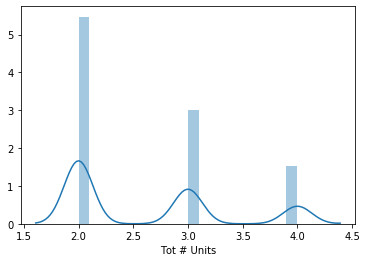

In [294]:
sns.distplot(df_main['Tot # Units']);